# Trabalho Final - Machine Learning

## Carlos A. F. junior - 385154

### Problema: What's Cooking? (Plataforma Kaggle)
* A partir de receitas culinárias, categoriza o tipo de culinária
* Declaração do problema: Preveja o tipo de culinária com base em dados fornecidos (ingredientes). Esta é uma tarefa de classificação que requer processamento e análise de texto.
    

### Foi utilizado neste trabalho somente o dataset de treino.
* O dataset inicialmente possui 3 colunas 
    1. 'cuisine': Label da categoria daquele prato
    2. 'id': Número de identificação de cada prato
    3. 'ingredients': ingredientes que compõe cada prato
* Possui 39774 pratos

### Importação das bibliotecas que serão utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors, DistanceMetric, KNeighborsClassifier

from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from ml_libs import my_metrics
from sklearn import metrics

# Análise exploratória dos dados 


### Lendo o DataFrame do arquivo '.json'

In [2]:
df = pd.read_json('ml_data/train.json')

### Visualização inicial dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [4]:
df.shape

(39774, 3)

In [5]:
print("O dataset contém em {} receitas".format(len(df)))

O dataset contém em 39774 receitas


In [6]:
df.head(5)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [7]:
print("Número de categorias culinárias: {}".format(len(df.cuisine.unique())))
df.cuisine.unique()

Número de categorias culinárias: 20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [8]:
dicio = dict(zip(df.cuisine.value_counts().index, df.cuisine.value_counts()))
print('Nº de receitas | Cozinha\n\t---------------')
for i in dicio.keys():
    print('\t', dicio[i], " | ", i)

Nº de receitas | Cozinha
	---------------
	 7838  |  italian
	 6438  |  mexican
	 4320  |  southern_us
	 3003  |  indian
	 2673  |  chinese
	 2646  |  french
	 1546  |  cajun_creole
	 1539  |  thai
	 1423  |  japanese
	 1175  |  greek
	 989  |  spanish
	 830  |  korean
	 825  |  vietnamese
	 821  |  moroccan
	 804  |  british
	 755  |  filipino
	 667  |  irish
	 526  |  jamaican
	 489  |  russian
	 467  |  brazilian


In [9]:
pre = list()
for i in dicio.keys():
    pre.append([i, dicio[i]])
df_plt = pd.DataFrame(data=pre, columns=('Cozinha','Nº de receitas'))

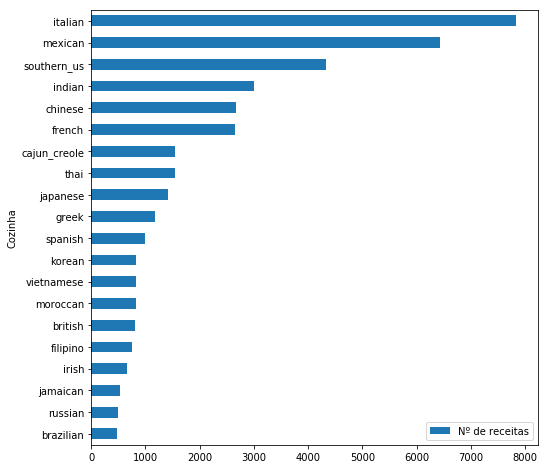

In [10]:
df_plt.sort_values(by='Nº de receitas').plot(kind='barh', x=0, y='Nº de receitas', figsize=(8,8))

In [11]:
print('Número máximo de ingredientes num prato: ', df['ingredients'].str.len().max())
print('Número mínimo de ingredientes num prato: ', df['ingredients'].str.len().min())

Número máximo de ingredientes num prato:  65
Número mínimo de ingredientes num prato:  1


In [12]:
longrecipes = df[df['ingredients'].str.len() > 20]
print("{} receitas possuem mais de 20 ingredientes!".format(len(longrecipes)))
longrecipes.head(5)

1004 receitas possuem mais de 20 ingredientes!


,cuisine,id,ingredients
55,jamaican,3535,"[bread crumbs, unsalted butter, onion powder, ..."
71,indian,45839,"[burger buns, fresh cilantro, chili powder, ga..."
251,indian,6862,"[tomatoes, red chile powder, boneless chicken ..."
294,filipino,9829,"[sugar, fresh cilantro, hoisin sauce, butter, ..."
342,chinese,20039,"[chicken broth, white wine, zucchini, salted r..."


In [13]:
smallrecipes = df[df['ingredients'].str.len() < 10]
print("{} receitas possuem menos de 10 ingredientes!".format(len(smallrecipes)))
smallrecipes.head(5)

17083 receitas possuem menos de 10 ingredientes!


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."
16,british,34466,"[greek yogurt, lemon curd, confectioners sugar..."
17,italian,1420,"[italian seasoning, broiler-fryer chicken, may..."


In [14]:
df = df.drop(labels=smallrecipes.index.values)
df = df.drop(labels=longrecipes.index.values)

In [15]:
df = df.reset_index()
df = df.drop(columns=['index'])
df.head(10)

,cuisine,id,ingredients
0,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
1,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
2,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
3,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
4,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
5,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
6,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
7,italian,5875,"[pimentos, sweet pepper, dried oregano, olive ..."
8,chinese,45887,"[low sodium soy sauce, fresh ginger, dry musta..."
9,italian,2698,"[Italian parsley leaves, walnuts, hot red pepp..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21687 entries, 0 to 21686
Data columns (total 3 columns):
cuisine        21687 non-null object
id             21687 non-null int64
ingredients    21687 non-null object
dtypes: int64(1), object(2)
memory usage: 508.4+ KB


### Separando todos os ingredientes de todos os pratos

In [17]:
partial = []

for line in range(0, len(df), 1):
    for column in range(0, len(df['ingredients'][line]), 1):
        partial.append(df['ingredients'][line][column])

features = np.asarray(list(dict.fromkeys(partial)))
print(len(partial), features.shape)
print(features)

287141 (5619,)
['plain flour' 'ground pepper' 'salt' ... 'crushed cheese crackers'
 'cheddar cheese soup' 'hot tea']


In [18]:
counts = {}
for ingr in partial:
    counts[ingr] = 0
for ingr in partial:
    counts[ingr] += 1

In [19]:
i = 0
for key in sorted(counts, key=counts.get, reverse=True):
    if i == 50:
        break
    print(counts[key], ' : ' , key)
    i += 1

11753  :  salt
5990  :  onions
5415  :  garlic
5340  :  olive oil
4823  :  water
4557  :  garlic cloves
3550  :  sugar
3420  :  ground black pepper
2995  :  pepper
2986  :  vegetable oil
2956  :  all-purpose flour
2810  :  butter
2358  :  soy sauce
2241  :  carrots
2233  :  green onions
2125  :  ground cumin
2056  :  tomatoes
2039  :  kosher salt
1971  :  eggs
1905  :  large eggs
1875  :  black pepper
1626  :  unsalted butter
1583  :  extra-virgin olive oil
1520  :  chili powder
1514  :  red bell pepper
1423  :  corn starch
1420  :  scallions
1400  :  ginger
1382  :  sesame oil
1317  :  oil
1304  :  purple onion
1290  :  dried oregano
1224  :  diced tomatoes
1200  :  chopped cilantro fresh
1188  :  fresh ginger
1170  :  milk
1165  :  fresh parsley
1162  :  chicken broth
1158  :  jalapeno chilies
1149  :  minced garlic
1145  :  cooking spray
1128  :  grated parmesan cheese
1105  :  cayenne pepper
1049  :  shallots
1042  :  baking powder
1038  :  fresh lemon juice
1035  :  brown sugar
98

### Definição de um degundo dataframe com as features

In [20]:
values = np.zeros((df.shape[0], len(features)))
df_new = pd.DataFrame(data=values.astype('bool'), columns=features)
df_new.head(5)

,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,...,orange glaze,hing (powder),ciabatta loaf,ruby red grapefruit,golden mushroom soup,lop chong,chilli bean sauce,crushed cheese crackers,cheddar cheese soup,hot tea
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
for line in range(0, len(df), 1):
    for column in range(0, len(df['ingredients'][line]), 1):
        df_new.at[line, df['ingredients'][line][column]] = True

In [22]:
df_new.head(5)

,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,...,orange glaze,hing (powder),ciabatta loaf,ruby red grapefruit,golden mushroom soup,lop chong,chilli bean sauce,crushed cheese crackers,cheddar cheese soup,hot tea
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21687 entries, 0 to 21686
Columns: 5619 entries, plain flour to hot tea
dtypes: bool(5619)
memory usage: 116.2 MB


### Inserção da coluna 'id' no dataframe das features, para ser usado como 'key' para o merge dos dataframes 

In [24]:
df_new.insert(0, 'id', df['id'])
total = pd.merge(df, df_new, on='id')
total.head(5)

,cuisine,id,ingredients,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,...,orange glaze,hing (powder),ciabatta loaf,ruby red grapefruit,golden mushroom soup,lop chong,chilli bean sauce,crushed cheese crackers,cheddar cheese soup,hot tea
0,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21687 entries, 0 to 21686
Columns: 5622 entries, cuisine to hot tea
dtypes: bool(5619), int64(1), object(2)
memory usage: 116.9+ MB


### Remoção de colunas não significativas

In [26]:
total = total.drop(['ingredients', 'id'], axis=1)

In [27]:
cols = total.columns.tolist()
cols = cols[1:] + cols[:1]
total = total[cols]
total.head(5)

,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,...,hing (powder),ciabatta loaf,ruby red grapefruit,golden mushroom soup,lop chong,chilli bean sauce,crushed cheese crackers,cheddar cheese soup,hot tea,cuisine
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,southern_us
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,filipino
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,indian
3,True,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,jamaican
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,spanish


In [28]:
i = 0
for key in sorted(counts, key=counts.get, reverse=True):
    if i == 50:
        break
    total = total.drop(key, axis=1)
    i += 1

In [29]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21687 entries, 0 to 21686
Columns: 5570 entries, plain flour to cuisine
dtypes: bool(5569), object(1)
memory usage: 115.5+ MB


In [30]:
total.head(5)

,plain flour,ground pepper,thyme,green tomatoes,yellow corn meal,mayonaise,cooking oil,green chilies,grilled chicken breasts,yellow onion,...,hing (powder),ciabatta loaf,ruby red grapefruit,golden mushroom soup,lop chong,chilli bean sauce,crushed cheese crackers,cheddar cheese soup,hot tea,cuisine
0,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,southern_us
1,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,filipino
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,indian
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,jamaican
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,spanish


In [31]:
len(np.unique(total['cuisine']))

20

### Divisão entre features e label

In [32]:
X = total.values[:, :-1]
y = total.values[:, -1]
X.shape, y.shape

((21687, 5569), (21687,))

### Divisão do dataset em Treino (80%) e Teste (20%)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17349, 5569), (4338, 5569), (17349,), (4338,))

### Criação dos modelos

In [34]:
models = {}
models['DumClas'] = DummyClassifier()
models['AdaClas'] = AdaBoostClassifier()
models['RFoClas'] = RandomForestClassifier(n_estimators=100)

models['GaussNB'] = GaussianNB()
models['__SVM__'] = SVC(gamma='auto')
models['__KNN__'] = KNeighborsClassifier()

### Treinando os modelos

In [35]:
y_pred = {}
for k in models:
    print(k)
    models[k].fit(X_train, y_train)
    y_pred[k] = models[k].predict(X_test)

DumClas
AdaClas
RFoClas
GaussNB
__SVM__
__KNN__


### Avaliação dos modelos baseado na acurácia

In [36]:
for k in models:
    print(k, accuracy_score(y_test, y_pred[k]))

DumClas 0.09359151682803135
AdaClas 0.5053019824804057
RFoClas 0.7298294144767173
GaussNB 0.4677270631627478
__SVM__ 0.18118948824343015
__KNN__ 0.5760719225449515
